<a href="https://colab.research.google.com/github/shoulhafiz/python_data_science/blob/master/congestion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://malaya-dataset.s3-ap-southeast-1.amazonaws.com/tutorial/bigquery-congestion.csv

--2019-11-19 07:30:53--  https://malaya-dataset.s3-ap-southeast-1.amazonaws.com/tutorial/bigquery-congestion.csv
Resolving malaya-dataset.s3-ap-southeast-1.amazonaws.com (malaya-dataset.s3-ap-southeast-1.amazonaws.com)... 52.219.40.191
Connecting to malaya-dataset.s3-ap-southeast-1.amazonaws.com (malaya-dataset.s3-ap-southeast-1.amazonaws.com)|52.219.40.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147681357 (141M) [text/csv]
Saving to: ‘bigquery-congestion.csv’

bigquery-congestion 100%[===================>] 140.84M  10.3MB/s    in 16s     

2019-11-19 07:31:10 (8.82 MB/s) - ‘bigquery-congestion.csv’ saved [147681357/147681357]



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

seaborn.set()

In [5]:
df = pd.read_csv('bigquery-congestion.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857409 entries, 0 to 857408
Data columns (total 28 columns):
RowId                      857409 non-null int64
IntersectionId             857409 non-null int64
Latitude                   857409 non-null float64
Longitude                  857409 non-null float64
EntryStreetName            849220 non-null object
ExitStreetName             851875 non-null object
EntryHeading               857409 non-null object
ExitHeading                857409 non-null object
Hour                       857409 non-null int64
Weekend                    857409 non-null int64
Month                      857409 non-null int64
Path                       857409 non-null object
TotalTimeStopped_p20       857409 non-null int64
TotalTimeStopped_p40       857409 non-null int64
TotalTimeStopped_p50       857409 non-null int64
TotalTimeStopped_p60       857409 non-null int64
TotalTimeStopped_p80       857409 non-null int64
TimeFromFirstStop_p20      857409 non-null int6

In [6]:
df['City'].value_counts()

Philadelphia    388322
Boston          182050
Atlanta         153363
Chicago         133674
Name: City, dtype: int64

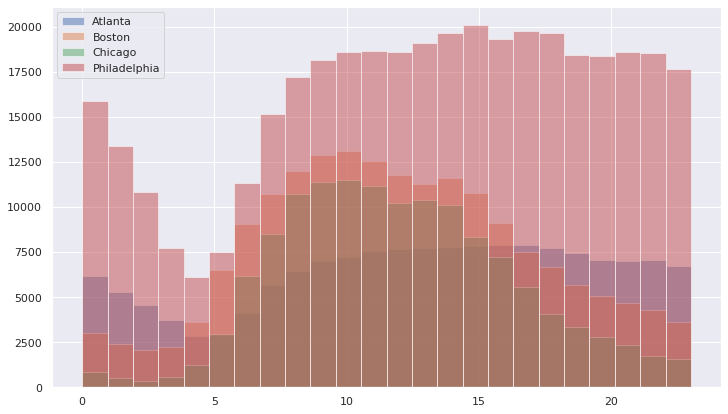

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 7))

cities = np.unique(df['City'])
for city in cities:
  filtered = df.loc[df['City'] == city]
  filtered['Hour'].hist(bins = 24, label = city, alpha = 0.5)
plt.legend()
plt.show()

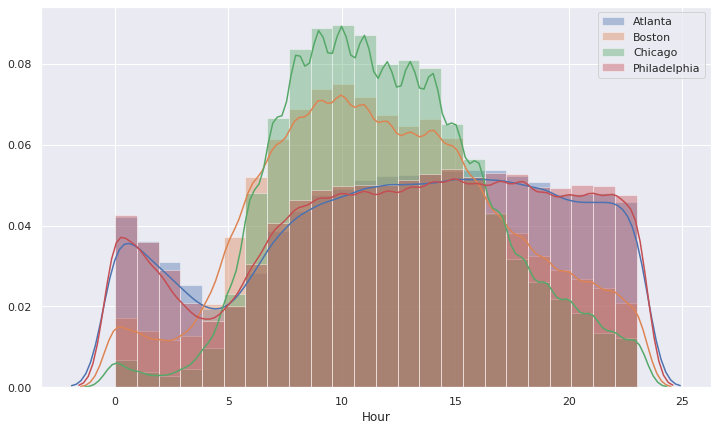

In [14]:
plt.figure(figsize = (12, 7))

for city in cities:
  filtered = df.loc[df['City'] == city]
  sns.distplot(filtered['Hour'], bins = 24, label = city)

plt.legend()
plt.show()

In [19]:
df['TotalTimeStopped_p50'].describe()

count    857409.000000
mean          7.681874
std          15.553418
min           0.000000
25%           0.000000
50%           0.000000
75%          10.000000
max         343.000000
Name: TotalTimeStopped_p50, dtype: float64

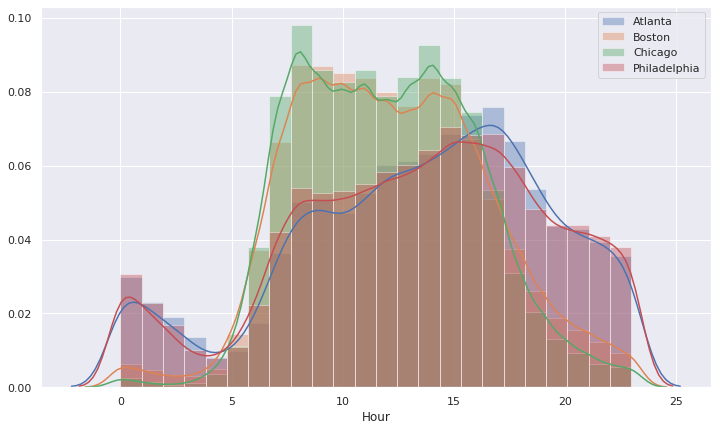

In [20]:
filtered = df.loc[df['TotalTimeStopped_p50'] >= 10]

plt.figure(figsize = (12, 7))

cities = np.unique(filtered['City'])
for city in cities:
  filtered_nested = filtered.loc[filtered['City'] == city]
  sns.distplot(filtered_nested['Hour'], bins = 24, label = city)

plt.legend()
plt.show()

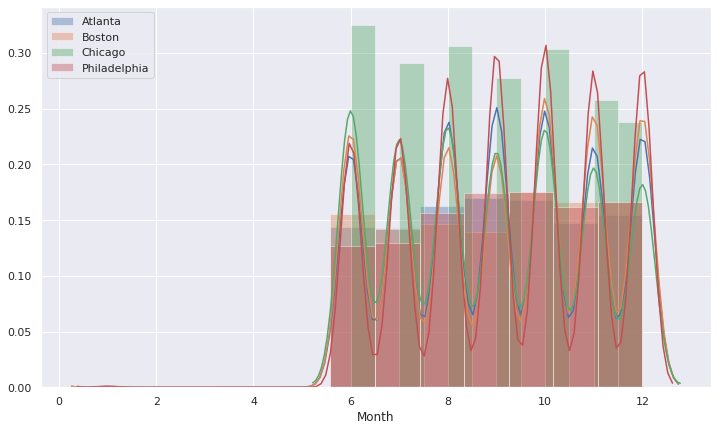

In [21]:
plt.figure(figsize = (12, 7))

cities = np.unique(filtered['City'])
for city in cities:
  filtered_nested = filtered.loc[filtered['City'] == city]
  sns.distplot(filtered_nested['Month'], bins = 12, label = city)

plt.legend()
plt.show()

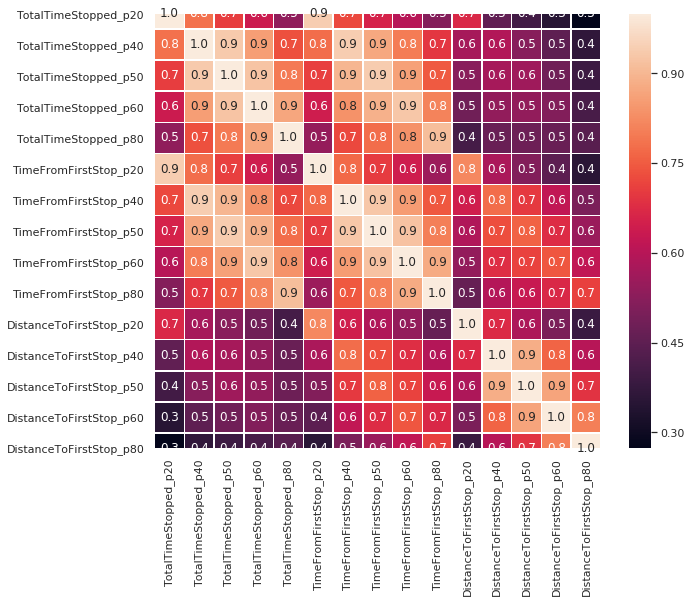

In [22]:
import plotly.express as px

f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.iloc[:,12:].corr(),annot=True, linewidths=.5, fmt='.1f', ax=ax)

plt.show()

In [23]:
TotalTimeStopped=df.groupby(['City','Latitude','Longitude'])\
['TotalTimeStopped_p50'].mean().reset_index()

fig = px.scatter_mapbox(TotalTimeStopped[TotalTimeStopped["City"]=='Boston'], 
                        lat="Latitude", lon="Longitude",size="TotalTimeStopped_p50",
                        size_max=12,
                        color="TotalTimeStopped_p50", 
                        color_continuous_scale=px.colors.sequential.Inferno, zoom=11)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [24]:
important = ['Latitude', 'Longitude', 'EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'City', 'TotalTimeStopped_p50', 'TimeFromFirstStop_p50',
       'DistanceToFirstStop_p50']

df = df[important]
df.shape

(857409, 13)

In [0]:
df = df.dropna()

In [41]:
df.head(2)

,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,City,TotalTimeStopped_p50,TimeFromFirstStop_p50,DistanceToFirstStop_p50
0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,Atlanta,0,0,0.0
1,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,Atlanta,0,0,0.0


In [42]:
df.columns

Index(['Latitude', 'Longitude', 'EntryStreetName', 'ExitStreetName',
       'EntryHeading', 'ExitHeading', 'Hour', 'Weekend', 'Month', 'City',
       'TotalTimeStopped_p50', 'TimeFromFirstStop_p50',
       'DistanceToFirstStop_p50'],
      dtype='object')

In [0]:
X = df.iloc[:, :-3]
Y = df.iloc[:, -3:]

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(X[['Latitude', 'Longitude']])
pca.shape

(844259, 2)

In [0]:
X['pca1'] = pca[:,0]
X['pca2'] = pca[:,1]

In [46]:
X.head(2)

,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,City,pca1,pca2
0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,Atlanta,7.820285,-4.061571
1,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,Atlanta,7.820285,-4.061571


In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844259 entries, 0 to 857408
Data columns (total 12 columns):
Latitude           844259 non-null float64
Longitude          844259 non-null float64
EntryStreetName    844259 non-null object
ExitStreetName     844259 non-null object
EntryHeading       844259 non-null object
ExitHeading        844259 non-null object
Hour               844259 non-null int64
Weekend            844259 non-null int64
Month              844259 non-null int64
City               844259 non-null object
pca1               844259 non-null float64
pca2               844259 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 83.7+ MB


In [52]:
from sklearn.preprocessing import LabelEncoder

labelencoder = {}

for column in X.columns:
    if X[column].dtype == 'O':
      labelencoder[column] = LabelEncoder().fit(X[column])
        
labelencoder, X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844259 entries, 0 to 857408
Data columns (total 12 columns):
Latitude           844259 non-null float64
Longitude          844259 non-null float64
EntryStreetName    844259 non-null object
ExitStreetName     844259 non-null object
EntryHeading       844259 non-null object
ExitHeading        844259 non-null object
Hour               844259 non-null int64
Weekend            844259 non-null int64
Month              844259 non-null int64
City               844259 non-null object
pca1               844259 non-null float64
pca2               844259 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 83.7+ MB


({'City': LabelEncoder(),
  'EntryHeading': LabelEncoder(),
  'EntryStreetName': LabelEncoder(),
  'ExitHeading': LabelEncoder(),
  'ExitStreetName': LabelEncoder()},
 None)

In [53]:
for column in df.columns:
    if column in labelencoder:
        X[column] = labelencoder[column].transform(X[column])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844259 entries, 0 to 857408
Data columns (total 12 columns):
Latitude           844259 non-null float64
Longitude          844259 non-null float64
EntryStreetName    844259 non-null int64
ExitStreetName     844259 non-null int64
EntryHeading       844259 non-null int64
ExitHeading        844259 non-null int64
Hour               844259 non-null int64
Weekend            844259 non-null int64
Month              844259 non-null int64
City               844259 non-null int64
pca1               844259 non-null float64
pca2               844259 non-null float64
dtypes: float64(4), int64(8)
memory usage: 83.7 MB


In [50]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844259 entries, 0 to 857408
Data columns (total 3 columns):
TotalTimeStopped_p50       844259 non-null int64
TimeFromFirstStop_p50      844259 non-null int64
DistanceToFirstStop_p50    844259 non-null float64
dtypes: float64(1), int64(2)
memory usage: 25.8 MB


In [54]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2)

train_X.shape, test_X.shape

((675407, 12), (168852, 12))

In [55]:
%%time
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = MultiOutputRegressor(RandomForestRegressor()).fit(train_X, train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



CPU times: user 2min 14s, sys: 687 ms, total: 2min 15s
Wall time: 2min 15s


In [0]:
predict_Y = rf.predict(test_X)

real_Y = test_Y.values

In [58]:
predict_Y.shape, real_Y.shape

((168852, 3), (168852, 3))

In [59]:
# rmse for TotalTimeStopped

np.sqrt(((real_Y[:,0] - predict_Y[:,0]) ** 2).mean())

10.115732907643562

In [60]:
# rmse for TimeFromFirstStop

np.sqrt(((real_Y[:,1] - predict_Y[:,1]) ** 2).mean())

15.279260208804876

In [61]:
# rmse for DistanceToFirstStop

np.sqrt(((real_Y[:,2] - predict_Y[:,2]) ** 2).mean())

51.49295738030682